In [1]:
##### Import all necessity functions for Machine Learning #####
import sys
import math
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as shc
import warnings
import zipfile
import cv2
import os
import re
import nltk
import random
import requests
from bs4 import BeautifulSoup
import re
from collections import Counter
from functools import reduce
from itertools import chain
from wordcloud import WordCloud
from google.colab.patches import cv2_imshow
from keras.preprocessing import image
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression, SelectKBest, chi2, VarianceThreshold
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTEN, SMOTENC, SVMSMOTE, KMeansSMOTE, BorderlineSMOTE, ADASYN
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor, NearestNeighbors
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier, SGDRegressor, Perceptron
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor, VotingClassifier, VotingRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor, StackingClassifier, StackingRegressor
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score, accuracy_score, recall_score, precision_score, f1_score, silhouette_score
from xgboost import XGBClassifier, XGBRegressor

##### Download keras #####
!pip install keras

##### Remove all warnings #####
import warnings
warnings.filterwarnings("ignore")

##### Import all necessity functions for Neural Network #####
import tensorflow as tf
from keras.models import Sequential, Model
from keras.utils import plot_model
from keras.layers import Dense, Conv2D, LSTM, GRU, RNN, Flatten, AvgPool2D, MaxPool2D, GlobalAveragePooling2D, BatchNormalization, Dropout, LeakyReLU, ELU, PReLU,  Embedding
from keras.activations import tanh, relu, sigmoid, softmax, swish
from keras.regularizers import L1, L2, L1L2
from keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam, Adamax, Nadam
from keras.initializers import HeNormal, HeUniform, GlorotNormal, GlorotUniform
from keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy, hinge, MSE, MAE, Huber, BinaryCrossentropy
import keras.utils as image
from google.colab.patches import cv2_imshow
from keras.utils import plot_model

##### Plotting the confusion matrix #####
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix

###### NLP Libraries ######

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

###### Download functions for nltk ######

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

#####Import the dataset

In [2]:
df = pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#####Convert this target class into Numerical

In [3]:
df.loc[:, 'Species'] = df.loc[:, 'Species'].\
      map({value: index for index, value\
      in enumerate(df.loc[:, 'Species'].value_counts().index)})

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


#####Scaling the dataset

In [4]:
StandardScaler = StandardScaler()
independent = StandardScaler.fit_transform(df.iloc[:, :-1].values)
independent = pd.DataFrame(independent, columns = df.columns[:-1])
df = pd.concat([independent, df.iloc[:, -1]], axis = 1)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-1.720542,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.697448,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.674353,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.651258,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.628164,-1.021849,1.263460,-1.341272,-1.312977,0


#####Drop the Id column

In [5]:
try:
  df.drop(['Id'], axis = 1, inplace = True)
except Exception as e:
  print(e.with_traceback)
else:
  print("Id column is deleted !!!")

Id column is deleted !!!


#####Split the dataset with train and test

In [6]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

print("The shape of X_train is # {} ".format(X_train.shape),'\n')
print("The shape of X_test  is # {} ".format(X_test .shape),'\n')
print("The shape of y_train is # {} ".format(y_train.shape),'\n')
print("The shape of y_test  is # {} ".format(y_test.shape))

The shape of X_train is # (112, 4)  

The shape of X_test  is # (38, 4)  

The shape of y_train is # (112,)  

The shape of y_test  is # (38,) 


#####Initiate the DataLoader with batch_size :: 16

In [7]:
import torch
import torch.nn as nn
import torch.functional as F
import torch.optim as optim
from torchsummary import summary
from torch.utils.data import Dataset, DataLoader

""""Convert X_train and X_test into torch Float"""
X_train = torch.tensor(data = X_train, dtype = torch.float32)
X_test  = torch.tensor(data = X_test, dtype = torch.float32)

"""Initiate the DataLoader"""
loader = DataLoader(dataset = list(zip(X_train, y_train)), batch_size = 16, shuffle = True)
print("The batch size of this loader # {} ".format(loader.batch_size))

The batch size of this loader # 16 


In [8]:
data, labels = next(iter(loader))
print("The shape of singular batch size of training data # {} ".format(data.shape))
print("The shape of singular batch size of label data # {} ".format(labels.shape))

The shape of singular batch size of training data # torch.Size([16, 4]) 
The shape of singular batch size of label data # torch.Size([16]) 


#####Model Building without using L1 & L2

In [9]:
"""Create a class named IrisClassifier"""
class IrisClassifier(nn.Module):
  """
  Create a constructor
  * number of input_dimension = 4
  """
  def __init__(self, input_dimension, in_feature = None, out_feature = None, output_feature = None):
    """Call the super() class for inherit the parent class (nn.Module)"""
    super().__init__()
    """
    Create first hidden layer & activation function
    input_feature  = 4,
    output_feature = 128
    """
    self.hiddenLayer1 = nn.Linear(in_features = input_dimension, out_features = 128)
    self.activation1  = nn.ReLU()

    """
    Create second hidden layer & activation function
    input_feature  = 128,
    output_feature = 64
    """
    self.hiddenLayer2 = nn.Linear(in_features = 128, out_features = 64)
    self.activation2  = nn.ReLU()

    """
    Create the output layer & activation function
    in_feature  = 64,
    out_feature = 3
    """
    self.outputLayer = nn.Linear(in_features = 64, out_features = output_feature)
    self.actiOutput  = nn.Softmax()

  def forward(self, x):
    x = self.activation1(self.hiddenLayer1(x))
    x = self.activation2(self.hiddenLayer2(x))
    x = self.actiOutput(self.outputLayer(x))

    return x


In [10]:
### Call the model
try:
  model = IrisClassifier(input_dimension = X_train.shape[1], output_feature = len(df.iloc[:, -1].value_counts()))
except Exception as e:
  print(e.with_traceback)
else:
  print(model.parameters)

<bound method Module.parameters of IrisClassifier(
  (hiddenLayer1): Linear(in_features=4, out_features=128, bias=True)
  (activation1): ReLU()
  (hiddenLayer2): Linear(in_features=128, out_features=64, bias=True)
  (activation2): ReLU()
  (outputLayer): Linear(in_features=64, out_features=3, bias=True)
  (actiOutput): Softmax(dim=None)
)>


In [11]:
### Display this model for better understanding
summary(model = model, input_size = X.shape)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1             [-1, 150, 128]             640
              ReLU-2             [-1, 150, 128]               0
            Linear-3              [-1, 150, 64]           8,256
              ReLU-4              [-1, 150, 64]               0
            Linear-5               [-1, 150, 3]             195
           Softmax-6               [-1, 150, 3]               0
Total params: 9,091
Trainable params: 9,091
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.45
Params size (MB): 0.03
Estimated Total Size (MB): 0.48
----------------------------------------------------------------


#####Initialize the loss & optimizer

In [12]:
LEARNING_RATE = 0.001
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(params = model.parameters(), lr = LEARNING_RATE)

#####Checking the model.parameters()

In [13]:
for parameter in model.parameters():
  print(parameter)

Parameter containing:
tensor([[ 0.2037,  0.0359, -0.3029,  0.2790],
        [-0.4484, -0.4630, -0.0817,  0.4991],
        [-0.4964, -0.0788, -0.0005, -0.3015],
        [-0.1708,  0.2042, -0.4869, -0.3412],
        [-0.4969, -0.1132, -0.2668,  0.4398],
        [ 0.2999,  0.0926,  0.2194,  0.4605],
        [-0.3637,  0.3267,  0.3287, -0.4987],
        [-0.1735, -0.3962,  0.1008,  0.3249],
        [-0.2573,  0.3512,  0.4094,  0.3712],
        [ 0.3880,  0.1761,  0.1740, -0.4614],
        [-0.3275,  0.1326, -0.4739, -0.0007],
        [-0.2096, -0.1880,  0.4620, -0.1842],
        [-0.2286,  0.4851, -0.1635,  0.0126],
        [-0.1506, -0.1600, -0.2427,  0.2727],
        [-0.1164, -0.2915,  0.1691,  0.1290],
        [-0.2160, -0.0672,  0.2038,  0.1603],
        [-0.2934, -0.1937, -0.1640,  0.0185],
        [-0.0836,  0.3912,  0.1234,  0.3792],
        [ 0.3798, -0.3464, -0.1380, -0.2783],
        [ 0.1229,  0.3253,  0.0645,  0.3602],
        [ 0.3633, -0.0774,  0.4217, -0.1356],
        [ 0.

#####Train the model

In [14]:
EPOCHS = 2000
LOSS = []
"""Initialize the model train()"""
model.train()
for epoch in range(EPOCHS):
  """
  Extract the X_batch and ybatch from the loader
  Initialize the loss function for each EPOCH
  """
  loss_calculate = []
  for (X_batch, y_batch) in loader:
    """
    Pass this X_train dataset to the model and do the prediction
    """
    prediction = model(X_batch)
    """
    Compute the loss function
    """
    loss = loss_function(prediction, y_batch)
    """Append this loss into the loss_calculate list"""
    loss_calculate.append(loss.item())
    """
    Compute the accuracy for each EPOCH, To do this:
    First, Find the highest index with respect to the probabilty that is stored in the `prediction`
    """
    labels_predicted = torch.argmax(prediction, dim = 1)
    """
    1. Initialize the Gradient of optimizer
    2. Do the backward() propagation of loss
    3. Do the step() of loss
    """
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  """Appending the loss"""
  LOSS.append(loss_calculate)

  """Display the loss and accuracy for each EPOCH"""
  print("*"*50, "EPOCH {} ".format(epoch + 1), "*"*50, "\n")
  print("\t"*2, "LOSS ## {}        &        ACCURACY ## {}  ".format(np.array(loss_calculate).mean(), accuracy_score(labels_predicted, y_batch)),"\n")

Streaming output truncated to the last 5000 lines.
************************************************** EPOCH 751  ************************************************** 

		 LOSS ## 0.5603888205119542        &        ACCURACY ## 1.0   

************************************************** EPOCH 752  ************************************************** 

		 LOSS ## 0.5603886672428676        &        ACCURACY ## 1.0   

************************************************** EPOCH 753  ************************************************** 

		 LOSS ## 0.5603886076382228        &        ACCURACY ## 0.9375   

************************************************** EPOCH 754  ************************************************** 

		 LOSS ## 0.5603888034820557        &        ACCURACY ## 1.0   

************************************************** EPOCH 755  ************************************************** 

		 LOSS ## 0.56038841179439        &        ACCURACY ## 0.9375   

****************************************

#####Compute the training and test evaluation

In [15]:
### For training

predicted = model(X_train)
predicted = torch.argmax(predicted, dim = 1)

print("ACCURACY  # {} ".format(accuracy_score(predicted, y_train)),'\n')
print("PRECISION # {} ".format(precision_score(predicted, y_train, average = "macro")),'\n')
print("RECALL    # {} ".format(recall_score(predicted, y_train, average = "macro")),'\n')
print("F1_SCORE  # {} ".format(f1_score(predicted, y_train, average = "macro")))

ACCURACY  # 0.9910714285714286  

PRECISION # 0.9914529914529915  

RECALL    # 0.9914529914529915  

F1_SCORE  # 0.9913419913419913 


In [16]:
### For Testing

predicted = model(X_test)
predicted = torch.argmax(predicted, dim = 1)

print("ACCURACY  # {} ".format(accuracy_score(predicted, y_test)),'\n')
print("PRECISION # {} ".format(precision_score(predicted, y_test, average = "macro")),'\n')
print("RECALL    # {} ".format(recall_score(predicted, y_test, average = "macro")),'\n')
print("F1_SCORE  # {} ".format(f1_score(predicted, y_test, average = "macro")))

ACCURACY  # 1.0  

PRECISION # 1.0  

RECALL    # 1.0  

F1_SCORE  # 1.0 


#####Display Loss for training

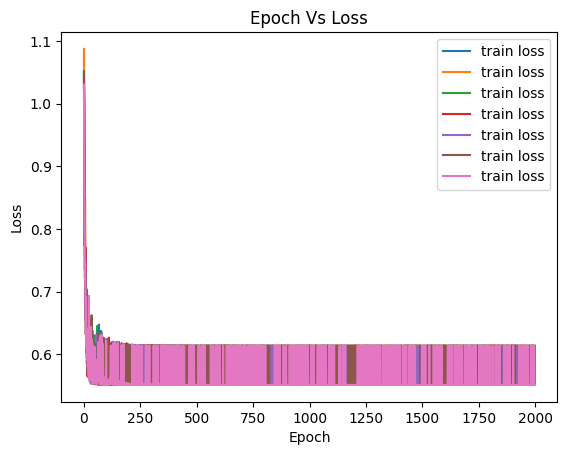

In [17]:
plt.title("Epoch Vs Loss")
plt.plot(np.array(LOSS), label = 'train loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Use Regularization (L2)

In [18]:
for param in model.parameters():
  print(torch.norm(param, 2))

tensor(8.7359, grad_fn=<LinalgVectorNormBackward0>)
tensor(3.9645, grad_fn=<LinalgVectorNormBackward0>)
tensor(14.1126, grad_fn=<LinalgVectorNormBackward0>)
tensor(0.7422, grad_fn=<LinalgVectorNormBackward0>)
tensor(3.4597, grad_fn=<LinalgVectorNormBackward0>)
tensor(0.1838, grad_fn=<LinalgVectorNormBackward0>)


In [19]:
EPOCHS = 2000
LOSS = []
L2_LAMBDA = 0.01
"""Initialize the model train()"""
model.train()
for epoch in range(EPOCHS):
  """
  Extract the X_batch and ybatch from the loader
  Initialize the loss function for each EPOCH
  """
  loss_calculate = []
  for (X_batch, y_batch) in loader:
    """
    Pass this X_train dataset to the model and do the prediction
    """
    prediction = model(X_batch)
    """
    Compute the loss function
    """
    loss = loss_function(prediction, y_batch)

    """
    Initialize the L2 Regularization
    The Formula of L2 Regularization = LOSS + (LAMBDA * WEIGHT^2)
    Here, torch.norm(parameter, 2) -> 2 means L2 regularization.
    """
    l2_reg = sum(torch.norm(param, 2) for param in model.parameters())
    loss = loss + L2_LAMBDA * l2_reg

    """Append this loss into the loss_calculate list"""
    loss_calculate.append(loss.item())
    """
    Compute the accuracy for each EPOCH, To do this:
    First, Find the highest index with respect to the probabilty that is stored in the `prediction`
    """
    labels_predicted = torch.argmax(prediction, dim = 1)
    """
    1. Initialize the Gradient of optimizer
    2. Do the backward() propagation of loss
    3. Do the step() of loss
    """
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  """Appending the loss"""
  LOSS.append(loss_calculate)

  """Display the loss and accuracy for each EPOCH"""
  print("*"*50, "EPOCH {} ".format(epoch + 1), "*"*50, "\n")
  print("\t"*2, "LOSS ## {}        &        ACCURACY ## {}  ".format(np.array(loss_calculate).mean(), accuracy_score(labels_predicted, y_batch)),"\n")

Streaming output truncated to the last 5000 lines.
************************************************** EPOCH 751  ************************************************** 

		 LOSS ## 0.6829078623226711        &        ACCURACY ## 0.9375   

************************************************** EPOCH 752  ************************************************** 

		 LOSS ## 0.6821920956884112        &        ACCURACY ## 1.0   

************************************************** EPOCH 753  ************************************************** 

		 LOSS ## 0.6830388988767352        &        ACCURACY ## 1.0   

************************************************** EPOCH 754  ************************************************** 

		 LOSS ## 0.6827423827988761        &        ACCURACY ## 1.0   

************************************************** EPOCH 755  ************************************************** 

		 LOSS ## 0.6830266203199115        &        ACCURACY ## 1.0   

*****************************************

In [20]:
### For training

predicted = model(X_train)
predicted = torch.argmax(predicted, dim = 1)

print("ACCURACY  # {} ".format(accuracy_score(predicted, y_train)),'\n')
print("PRECISION # {} ".format(precision_score(predicted, y_train, average = "macro")),'\n')
print("RECALL    # {} ".format(recall_score(predicted, y_train, average = "macro")),'\n')
print("F1_SCORE  # {} ".format(f1_score(predicted, y_train, average = "macro")))

ACCURACY  # 0.9910714285714286  

PRECISION # 0.9914529914529915  

RECALL    # 0.9914529914529915  

F1_SCORE  # 0.9913419913419913 


In [21]:
### For Testing

predicted = model(X_test)
predicted = torch.argmax(predicted, dim = 1)

print("ACCURACY  # {} ".format(accuracy_score(predicted, y_test)),'\n')
print("PRECISION # {} ".format(precision_score(predicted, y_test, average = "macro")),'\n')
print("RECALL    # {} ".format(recall_score(predicted, y_test, average = "macro")),'\n')
print("F1_SCORE  # {} ".format(f1_score(predicted, y_test, average = "macro")))

ACCURACY  # 1.0  

PRECISION # 1.0  

RECALL    # 1.0  

F1_SCORE  # 1.0 


#####Display Loss for training

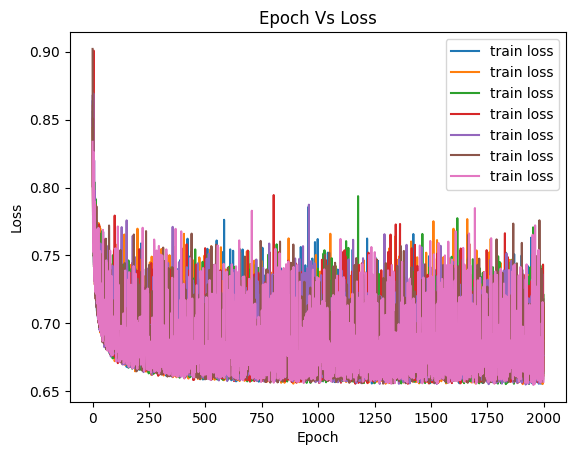

In [22]:
plt.title("Epoch Vs Loss")
plt.plot(np.array(LOSS), label = 'train loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

#L1 Regularization Formula

In [28]:
l1_reg = sum(torch.abs(param).sum() for param in model.parameters())

In [29]:
l1_reg

tensor(167.2775, grad_fn=<AddBackward0>)

In [30]:
l1_reg = sum(torch.norm(param, 1) for param in model.parameters())

In [31]:
l1_reg

tensor(167.2769, grad_fn=<AddBackward0>)